### NAO correlations with energy variables ###

Exploring how well the NAO correlates with energy variables on seasonal to decadal timescales during the winter (ONDJFM, DJFM, or DJF). Using the following datasets:

* CLEARHEADS - ERA5-derived energy time series, includes offshore wind in EEZs and Heating Degree Days.
* ERA5 - reanalysis product for deriving the NAO indices at different timescales.
* ENTSO-E - shorter observed time series of capacity factors and other energy variables. For ground truthing the CLEARHEADS data above.

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import local modules
import sys
import os
import glob

# Import third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import iris
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cdsapi
# import xesmf as xe
from datetime import datetime
from tqdm import tqdm
from scipy.stats import pearsonr

ERROR 1: PROJ: proj_create_from_database: Open of /apps/jasmin/jaspy/mambaforge_envs/jaspy3.10/mf-22.11.1-4/envs/jaspy3.10-mf-22.11.1-4-r20230718/share/proj failed


In [2]:
# Import the local functions
import functions_em as funcs_em

In [3]:
sys.path.append("/home/users/benhutch/energy-met-corr")
import dictionaries_em as dicts

sys.path.append("/home/users/benhutch/skill-maps/python")
import functions as fnc

### Testing scatter functions ###

In [4]:
# # /gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/tas_ONDJFM_global_1961_2014_2-9_4_20_1709338673.215247_nao_matched_members.npy


# # Dictionary for predictor var
# pred_var_dict = {
#     "lag": 4,
#     "alt_lag": "nao_matched",
#     "method": "nao_matched",
#     "region": "global",
# }

In [5]:
# # test the function for loading the scatter data
# dict = funcs_em.process_data_for_scatter(
#     season="ONDJFM",
#     forecast_range="2-9",
#     start_year=1961,
#     end_year=2014,
#     predictor_var="sfcWind",
#     predictor_var_dict=pred_var_dict,
#     predictand_var="sfcWind",
#     predictand_var_file=dicts.regrid_file,
#     region=dicts.uk_grid,
#     region_name="uk",
# )

In [6]:
# # Loop over dict and print the keys
# for key in dict.keys():
#     print(key)

In [7]:
# # Plot the scatter data
# funcs_em.plot_scatter(
#     scatter_dict=dict,
# )

### Downloading ERA5 data ###

For calculating the NAO index, we want to query the CDS API for ERA5 data:

* From 1950-2023
* For ONDJFM
* Monthly-means

*Note - this data should be regridded before comparison with the CLEARHEADS/ENTSO-E data*

In [8]:
# # Set up a new client
# c = cdsapi.Client()

In [9]:
# # Set up the dictionary for the ERA5 request
# era5_request_dict = {
#     'variable': 'mean_sea_level_pressure',
#     'product_type': 'monthly_averaged_reanalysis',
#     'year': [x for x in map(str, range(1950, 2023))],
#     'month': [1, 2, 3, 10, 11, 12],
#     'format': 'netcdf',
#     'time': '00:00'
# }

# # Print the request dictionary
# print(era5_request_dict)

In [10]:
# # Set up the target directory
# target_dir = '/gws/nopw/j04/canari/users/benhutch/ERA5'

# # Assert that the target directory exists
# assert os.path.exists(target_dir)

# # Assert that the target directory is not empty
# assert len(os.listdir(target_dir)) > 0

# # Set up the target file
# target_file = os.path.join(target_dir, 'era5_mslp_monthly_1950_2022_ONDJFM.nc')

# # Print the target file
# print(target_file)

# # If the target file does not exist, download the data
# if not os.path.exists(target_file):
#     c.retrieve(
#         'reanalysis-era5-single-levels',
#         era5_request_dict,
#         target_file)
# else:
#     print('The target file already exists: {}'.format(target_file))

Now we want to plot the observed spatial correlations between the NAO and 10m wind speeds and precipitation.

In [26]:
# Test this function
stats_dict = funcs_em.calc_nao_spatial_corr(
    season="DJFM",
    forecast_range="2-9",
    start_year=2005,
    end_year=2023,
    corr_var="psl",
)

/home/users/benhutch/.local/lib/python3.10/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/home/users/benhutch/.local/lib/python3.10/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Time dimension of obs: ['2005-12-31T00:00:00.000000000' '2006-12-31T00:00:00.000000000'
 '2007-12-31T00:00:00.000000000' '2008-12-31T00:00:00.000000000'
 '2009-12-31T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2011-12-31T00:00:00.000000000' '2012-12-31T00:00:00.000000000'
 '2013-12-31T00:00:00.000000000' '2014-12-31T00:00:00.000000000'
 '2015-12-31T00:00:00.000000000' '2016-12-31T00:00:00.000000000'
 '2017-12-31T00:00:00.000000000' '2018-12-31T00:00:00.000000000'
 '2019-12-31T00:00:00.000000000' '2020-12-31T00:00:00.000000000'
 '2021-12-31T00:00:00.000000000' '2022-12-31T00:00:00.000000000'
 '2023-12-31T00:00:00.000000000']
Time dimension of obs: ['2005-12-31T00:00:00.000000000' '2006-12-31T00:00:00.000000000'
 '2007-12-31T00:00:00.000000000' '2008-12-31T00:00:00.000000000'
 '2009-12-31T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2011-12-31T00:00:00.000000000' '2012-12-31T00:00:00.000000000'
 '2013-12-31T00:00:00.000000000' '2014-12-31T00:00:00.000000000'
 '2015-12-

In [27]:
# Extract the nao index
nao = stats_dict["nao"]

# Extract the corr var anomalies
corr_var_ts = stats_dict["corr_var_ts"]

In [28]:
# Print the shape of these
print(nao.shape)

# Print the shape of these
print(corr_var_ts.shape)

(11,)
(11, 72, 144)


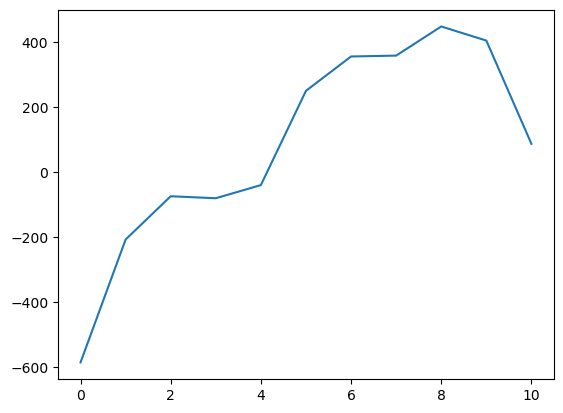

In [29]:
# Plot the nao index
plt.plot(nao)

In [30]:
# Create an empty array with the correct shape
corr_array = np.empty([corr_var_ts.shape[1], corr_var_ts.shape[2]])  # lat  # lon

# Same for the p-values
pval_array = np.empty([corr_var_ts.shape[1], corr_var_ts.shape[2]])  # lat  # lon

# Loop over the lats
for lat in tqdm(range(corr_var_ts.shape[1])):
    # Loop over the lons
    for lon in range(corr_var_ts.shape[2]):
        # Extract the corr_var_ts for the lat and lon
        corr_var_anom_values_lat_lon = corr_var_ts[:, lat, lon]

        # Replace NaNs with 0
        corr_var_anom_values_lat_lon = np.nan_to_num(
            corr_var_anom_values_lat_lon, nan=0
        )

        # Calculate the correlation
        corr, pval = pearsonr(nao, corr_var_anom_values_lat_lon)

        # Assign the correlation to the array
        corr_array[lat, lon] = corr

        # Assign the p-value to the array
        pval_array[lat, lon] = pval

# Print the shape of the corr_array
print("shape of corr_array: ", corr_array.shape)
print("shape of pval_array: ", pval_array.shape)

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [00:06<00:00, 10.75it/s]

shape of corr_array:  (72, 144)
shape of pval_array:  (72, 144)


lon1_idx_grid:  32
lon2_idx_grid:  88
lat1_idx_grid:  44
lat2_idx_grid:  68
lon1_idx_grid:  32
lon2_idx_grid:  88
lat1_idx_grid:  44
lat2_idx_grid:  68
len(corr_var_ts_gridbox):  11
len(nao):  11
len(corr_var_ts_gridbox):  11
len(nao):  11


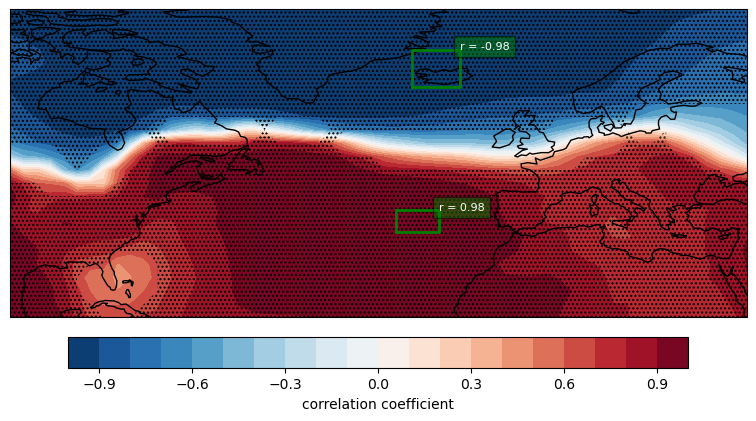

In [31]:
# Test the function
funcs_em.plot_corr(
    corr_array=corr_array,
    pval_array=pval_array,
    lats=stats_dict["lats"],
    lons=stats_dict["lons"],
    variable="psl",
    sig_threshold=0.05,
    plot_gridbox=[dicts.azores_grid_corrected, dicts.iceland_grid_corrected],
    nao=stats_dict["nao"],
    corr_var_ts=stats_dict["corr_var_ts"],
)